In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
df = pd.read_csv("salaries.csv")
def removeNonNumeric(series:pd.Series):
    return series[~series.isna() & ~(series.apply(lambda x: isinstance(x,str)))]
basepay = removeNonNumeric(df.BasePay)

/Users/ericreyes/.local/share/virtualenvs/ee104-gdVpYSdT/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
median = np.median(basepay)
mean = np.std(basepay)

In [84]:
def plotFreq(series:pd.Series):
    counts=(series.value_counts(normalize=True))
    plt.scatter(counts.index.values,counts.values)

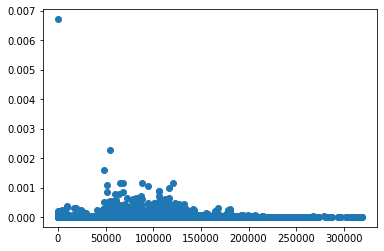

In [85]:
plotFreq(basepay)

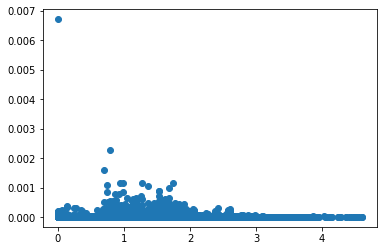

In [87]:
plotFreq(basepay/median)

In [90]:
def removeOutliers(series:pd.Series):
    med = np.median(series)
    std = np.std(series)
    return series[np.abs(med-series)<(3*std)]

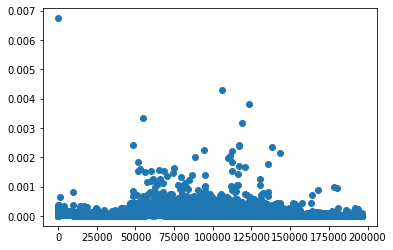

In [107]:
plotFreq(removeOutliers(basepay.apply(lambda x: round(x,-1))))

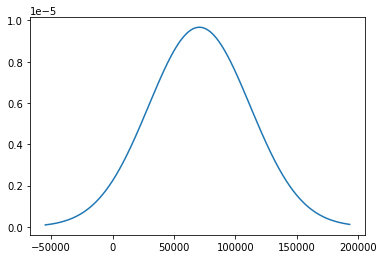

In [141]:
clean = removeOutliers(basepay)

plt.show()
med = np.median(clean)
std = np.std(clean)
x = np.linspace(med-3*std,med+3*std,10000)

plt.plot(x,stats.norm.pdf(x,mean,std))
# plotFreq(removeOutliers(basepay.apply(lambda x: round(x,-1))))
plt.show() 

In [139]:
sigmas=np.array([1,2,3])*np.std(basepay)
for sigma in sigmas:
    print((removeOutliers(basepay) < sigma).sum())

31092
83546
119128


167411.18
155966.02
212739.13
77916.0
134401.6
118602.0
92492.01
256576.96
176932.64
285262.0
194999.39
99722.0
294580.02
271329.03
174872.64
198778.01
268604.57
140546.87
168692.63
257510.59
257510.48
257510.44
140546.88
168692.63
140546.86
256470.41
92080.8
168692.59
261717.6
246225.6
234325.02
254027.63
248895.7
104861.39
177781.25
101953.2
245124.44
110661.2
132202.26
147158.85
168692.66
168692.63
218930.76
123013.02
196081.86
249375.02
168692.64
248895.77
233867.6
137729.92
168692.59
246305.62
140546.87
140546.88
140546.89
226206.8
240731.93
217410.8
115381.02
214745.44
123105.0
102571.24
140546.86
168692.62
148970.43
185369.69
177914.76
139167.39
122974.0
115455.44
220983.12
92782.61
95770.8
233357.28
130457.88
85578.61
174872.64
73754.05
140546.88
168692.62
172529.08
122272.69
168692.62
230827.12
217410.8
122404.98
150464.82
96814.36
88062.0
138878.82
188842.37
102722.4
149362.84
215914.03
168692.62
215180.76
208925.6
168692.67
122404.98
224035.85
168692.65
123105.0
105934.69
88